In [ ]:
"""
Feature Selection and Model Training
Based on the correlation analysis and visualizations, the following features show a significant relationship with popularity 
and can be used to train a music popularity prediction model:
-Energy
-Valence
-Danceability
-Loudness
-Acousticness
-Tempo
-Speechiness
-Liveness
These features capture various audio characteristics that influence the popularity of music tracks.

The next step is to train a Machine Learning model to predict the popularity of music using the features we have selected. 
So, let’s split and scale the data and then train the model using the random forest regression algorithm:
"""

In [ ]:
# firstly performing basic operations

In [24]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Spotify_data.csv')

In [3]:
df_copy = df

In [ ]:
# importing the recquired libraries
%pip install scikit-learn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [12]:
# selecting the feature and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
x = df_copy[features]
y = df_copy['Popularity']
# splitting the dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
# normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
# define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5)

grid_search_rf.fit(x_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(x_test_scaled)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

In [ ]:
# Now, let’s have a look at the actual vs predicted results of the test data:

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

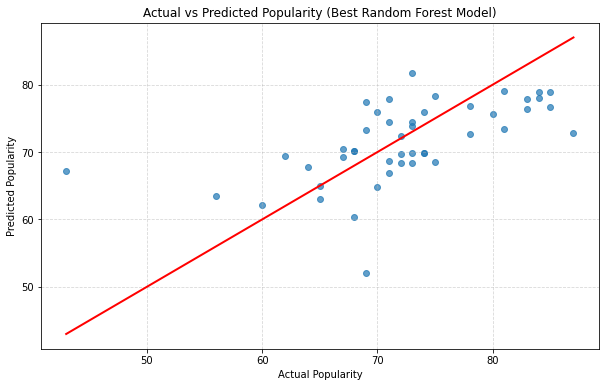

In [37]:
# make predictions
y_pred_best_rf = best_rf_model.predict(x_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

In [42]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_best_rf)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_best_rf)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R²) Score
r2 = r2_score(y_test, y_pred_best_rf)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 5.199653038695147
Mean Squared Error (MSE): 45.571439450855074
Root Mean Squared Error (RMSE): 6.75066214906768
R-squared (R²) Score: 0.31532827408400066


In [ ]:
                                                        ####Summary Of Model####
"""
The red line represents perfect predictions, where the predicted popularity would exactly match the actual popularity. 
Most of the points are clustered around this line, which indicates that the model is making reasonably accurate predictions. 
However, there are some deviations, particularly at lower popularity values, which suggest areas where the model’s predictions are less precise.
"""

In [ ]:
                                                         ####Overall Summary####
"""
Predicting the popularity of music can help music streaming platforms understand user preferences,
optimize playlists and enhance recommendation systems to improve user engagement and satisfaction.
I hope you liked this article on music popularity prediction with Machine Learning using Python.
"""